Please upload Fake.csv


Saving Fake.csv to Fake.csv
Now upload True.csv


Saving True.csv to True.csv

Class distribution:
 label
FAKE    23481
REAL    21417
Name: count, dtype: int64


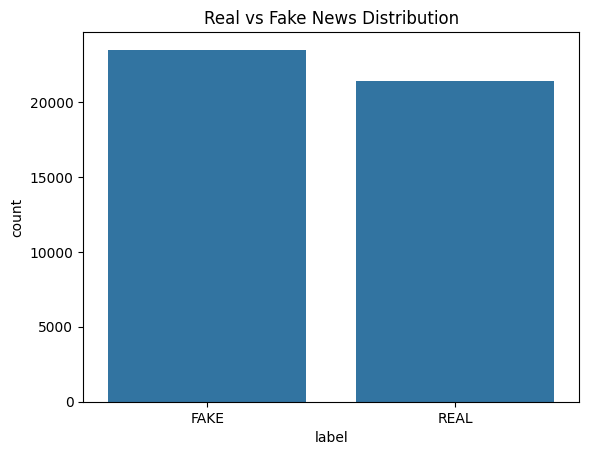


Accuracy: 0.9846325167037862

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4247
           1       0.99      0.98      0.99      4733

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



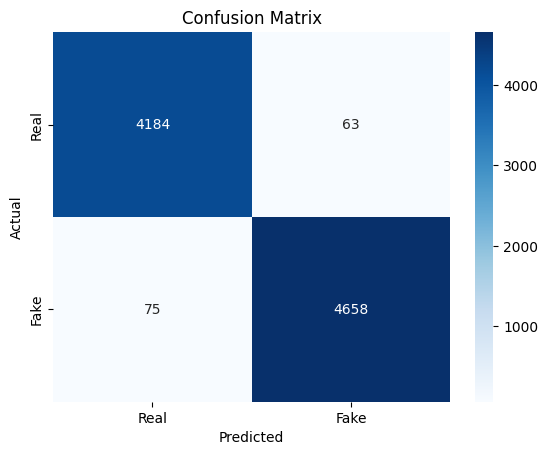

In [1]:
# 📰 Fake News Detection using Logistic Regression

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

# 2. Upload both Fake.csv and True.csv manually
print("Please upload Fake.csv")
uploaded1 = files.upload()

print("Now upload True.csv")
uploaded2 = files.upload()

# 3. Load and label the datasets
fake_df = pd.read_csv(next(iter(uploaded1)))
real_df = pd.read_csv(next(iter(uploaded2)))

fake_df['label'] = 'FAKE'
real_df['label'] = 'REAL'

# 4. Combine the datasets
df = pd.concat([fake_df, real_df], ignore_index=True)

# 5. Drop any nulls
df.dropna(inplace=True)

# 6. Display class distribution
print("\nClass distribution:\n", df['label'].value_counts())

sns.countplot(x='label', data=df)
plt.title('Real vs Fake News Distribution')
plt.show()

# 7. Preprocess text and labels
X = df['text']
y = df['label'].apply(lambda x: 1 if x == 'FAKE' else 0)  # 1 for fake, 0 for real

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 10. Model training
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 11. Prediction
y_pred = model.predict(X_test_vec)

# 12. Evaluation
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 13. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

